In [1]:
import pandas as pd

df = pd.read_csv('./datasets/obune_global.csv')
df.head()

,基準日,ファンド名,基準価額,累積分配金,純資産総額,受益権総口数,分配金再投資基準価額
0,2017/07/05,農林中金＜パートナーズ＞長期厳選投資 おおぶね,10000,0,999999,1000000,10000
1,2017/07/06,農林中金＜パートナーズ＞長期厳選投資 おおぶね,9982,0,998225,1000000,9982
2,2017/07/07,農林中金＜パートナーズ＞長期厳選投資 おおぶね,9935,0,993478,1000000,9935
3,2017/07/10,農林中金＜パートナーズ＞長期厳選投資 おおぶね,10068,0,1006775,1000000,10068
4,2017/07/11,農林中金＜パートナーズ＞長期厳選投資 おおぶね,10082,0,1008235,1000000,10082


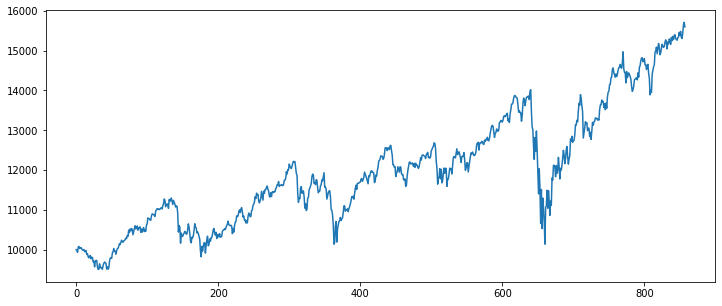

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 5))
plt.plot(df['基準価額'])

In [3]:
import numpy as np

t1 = df['基準価額'].values
t2 = np.roll(df['基準価額'].values, 1)
t2[0] = t2[1]

gap = t1 - t2
incr = (gap >= 0).astype('?')

ddf = df.copy()
ddf['gap'] = gap
ddf['increase'] = incr

In [4]:
src = []
nxt = []
sp = 0
rng = 5

while True:
    src.append(gap[sp:rng+sp])
    nxt.append(gap[sp+rng])
    if sp == len(incr) - rng - 1:
        break
    sp += 1
    
src = np.array(src)
nxt = np.array(nxt)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(src, nxt, test_size=0.3)

In [6]:
import lightgbm as lgb
model = lgb.LGBMRegressor()
model.fit(x_train, y_train)

LGBMRegressor()

In [7]:
y_pred = model.predict(x_test)

MSE 25766.094343065564


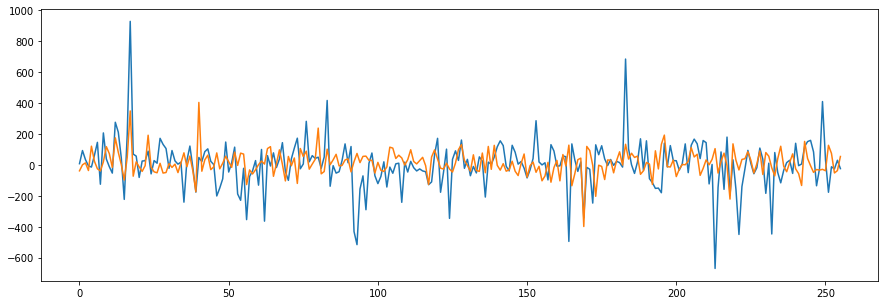

In [8]:
from sklearn.metrics import mean_squared_error

print('MSE', mean_squared_error(y_test, y_pred))

fig = plt.figure(figsize=(15, 5))
plt.plot(y_test)
plt.plot(y_pred)

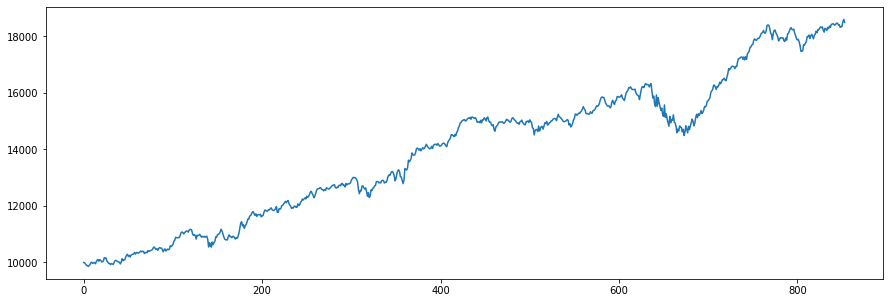

In [9]:
act = model.predict(src)
t = [10000]
for i in range(act.shape[0]):
    t.append(t[i] + act[i])

fig = plt.figure(figsize=(15, 5))
plt.plot(t)